Let's get some handson experience. Here we will be working on the MNSIT dataset.

Step 1 : Importing the library

In [0]:
import tensorflow as tf

Loading MNIST dataset , converting int to float by normalizing the data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


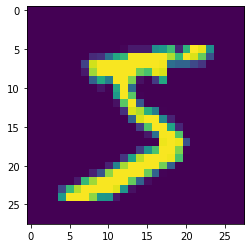

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

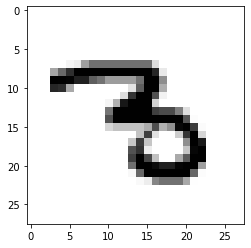

In [4]:
#Normalized image 
plt.imshow(x_train[30],cmap=plt.cm.binary)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

**logits**

The vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function. If the model is solving a multi-class classification problem, logits typically become an input to the softmax function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.logits sometimes refer to the element-wise inverse of the sigmoid function.

In [6]:
predictions = model(x_train[:1]).numpy()
#printing logits
predictions

array([[-0.33662623,  0.5780564 , -0.03933071, -0.88230824,  0.20079146,
         0.22951332,  0.64623845,  0.04908527, -0.01895759,  0.41662103]],
      dtype=float32)

The tf.nn.softmax function converts these logits to "probabilities" for each class:

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.06047688, 0.15094927, 0.08141477, 0.03504312, 0.1035111 ,
        0.10652724, 0.16160028, 0.08894096, 0.08309045, 0.12844598]],
      dtype=float32)

The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and returns a scalar loss for each example.

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.log(1/10) ~= 2.3.

In [9]:
loss_fn(y_train[:1], predictions).numpy()

2.2393546

In [0]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1383 - accuracy: 0.9592
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1059 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0729 - accuracy: 0.9776


The Model.evaluate method checks the models performance, usually on a "Validation-set" or "Test-set".

In [12]:
model.evaluate(x_test,  y_test, verbose=2)


313/313 - 0s - loss: 0.0759 - accuracy: 0.9774


[0.07589972019195557, 0.977400004863739]

The image classifier is now trained to ~98% accuracy on this dataset. 

Congrtulations we build our first model using tensorflow - MNSIT dataset